In [1]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
from FileManagement2 import df_to_csv

In [2]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6'
csv_path = os.path.join(out_path,'csv_file','pr_day_2020-2060','Project_PT_Revubue_2_Rev_2_01_moz_precipitation_2020-2060.csv')
precipitation_2020_2060 = pd.read_csv(csv_path,header=[0,1],index_col=[0,1,2,3,4])#*86400 # units kg.m^(-2).s^(-1)
# convert precipitation data from kg.m^(-2).s^(-1) to mm/day :  1 kg/m2/s = 86400 mm/day
# source: https://www.researchgate.net/post/How-do-I-convert-ERA-Interim-precipitation-estimates-from-kg-m2-s-to-mm-day

In [3]:
precipitation_2020_2060


Longitude
                                                                   33.625
Name project          Experiment Model      Date       Latitude          
PT_Revubue_2_Rev_2_01 ssp245     ACCESS-CM2 01-01-2030 -16.125   0.000218
                                            02-01-2030 -16.125   0.000104
                                            03-01-2030 -16.125   0.000121
                                            04-01-2030 -16.125   0.000217
                                            05-01-2030 -16.125   0.000131
...                                                                   ...
                      ssp370     TaiESM1    27-12-2060 -16.125   0.000002
                                            28-12-2060 -16.125   0.000000
                                            29-12-2060 -16.125   0.000003
                                            30-12-2060 -16.125   0.000322
                                            31-12-2060 -16.125   0.000230

[679380 rows x 1 columns]

In [4]:
# find non finite values

In [5]:
non_finite_index=np.where(~np.isfinite(precipitation_2020_2060))[0].tolist()
non_finite_index

[23435,
 24896,
 26357,
 27818,
 29279,
 30740,
 32201,
 33662,
 34758,
 36219,
 37680,
 39141,
 40602,
 42063,
 43524,
 44985,
 46081,
 47542,
 49003,
 50464,
 51925,
 53386,
 54847,
 56308,
 57404,
 58865,
 60326,
 61787,
 63248,
 64709,
 66170,
 67631,
 67938,
 69764,
 71590,
 73417,
 75243,
 77069,
 78895,
 136665,
 138126,
 139587,
 141048,
 142509,
 143970,
 145431,
 146892,
 147988,
 149449,
 150910,
 152371,
 153832,
 155293,
 156754,
 158215,
 159311,
 160772,
 162233,
 163694,
 165155,
 166616,
 168077,
 169538,
 193280,
 194741,
 196202,
 197663,
 199124,
 200585,
 202046,
 203507,
 204603,
 206064,
 207525,
 208986,
 210447,
 211908,
 213369,
 214830,
 215926,
 217387,
 218848,
 220309,
 221770,
 223231,
 224692,
 226153,
 227249,
 228710,
 230171,
 231632,
 233093,
 234554,
 236015,
 237476,
 237783,
 239609,
 241435,
 243262,
 245088,
 246914,
 248740,
 306510,
 307971,
 309432,
 310893,
 312354,
 313815,
 315276,
 316737,
 317833,
 319294,
 320755,
 322216,
 323677,
 325

In [6]:
df_non_finite=precipitation_2020_2060.iloc[non_finite_index]
df_non_finite

Longitude
                                                                    33.625
Name project          Experiment Model       Date       Latitude          
PT_Revubue_2_Rev_2_01 ssp245     BCC-CSM2-MR 29-02-2032 -16.125        NaN
                                             29-02-2036 -16.125        NaN
                                             29-02-2040 -16.125        NaN
                                             29-02-2044 -16.125        NaN
                                             29-02-2048 -16.125        NaN
...                                                                    ...
                      ssp370     TaiESM1     29-02-2044 -16.125        NaN
                                             29-02-2048 -16.125        NaN
                                             29-02-2052 -16.125        NaN
                                             29-02-2056 -16.125        NaN
                                             29-02-2060 -16.125        NaN

[11575 rows x 1 columns]

In [7]:
models_to_delete = []
for i in (np.arange(0,len(df_non_finite.index.tolist())-1)):
    if df_non_finite.index.tolist()[i][2] not in models_to_delete:
        models_to_delete.append(df_non_finite.index.tolist()[i][2])

In [8]:
models_to_delete

['BCC-CSM2-MR',
 'CanESM5',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'IITM-ESM',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'NESM3']

In [9]:
precipitation_2020_2060.shape

(679380, 1)

In [11]:
precipitation_2020_2060_no_NaN = precipitation_2020_2060.drop(models_to_delete,level=2)

In [12]:
precipitation_2020_2060_no_NaN.shape

(271752, 1)

In [13]:
precipitation_2020_2060_no_NaN.index.levels[2].tolist()

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CanESM5',
 'IITM-ESM',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1']

In [14]:
new_index_models=[]
for item in precipitation_2020_2060.index.levels[2].tolist():
    if item in models_to_delete:
        continue
    else:
        new_index_models.append(item)

In [15]:
type(new_index_models)

list

In [16]:
new_index_models

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0']

In [19]:
time_2020_2060=pd.date_range('01-01-2030','31-12-2060', freq='D').strftime('%d-%m-%Y').values.tolist()
list_time_2020_2060= [item[6:10] for item in time_2020_2060]
list_time_2020_2060

['2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 

In [22]:
df = pd.DataFrame()
midx = pd.MultiIndex.from_product([[precipitation_2020_2060_no_NaN.index.levels[0].tolist()[0],],precipitation_2020_2060_no_NaN.index.levels[1].tolist(), new_index_models, list_time_2020_2060],names=['Name project','Experiment', 'Model', 'Year'])
cols = pd.MultiIndex.from_product([('Precipitation mm/day',)])
Variable_dataframe = pd.DataFrame(data = precipitation_2020_2060_no_NaN.values*86400, 
                            index = midx,
                            columns = cols)
df = pd.concat([df,Variable_dataframe])
#df['year']=df.reset_index()['Month and year'].apply(lambda k: int(k.split('-')[1]))

In [23]:
DF=df.groupby(['Name project','Experiment', 'Model', 'Year']).max()

In [82]:
DF

Precipitation mm/day
Name project          Experiment Model      Year                     
PT_Revubue_2_Rev_2_01 ssp126     ACCESS-CM2 2030            18.858454
                                            2031            19.395542
                                            2032            19.424748
                                            2033            20.092435
                                            2034            20.215596
...                                                               ...
                      ssp585     MRI-ESM2-0 2056            26.004662
                                            2057            27.898901
                                            2058            52.359986
                                            2059            43.215728
                                            2060            25.456702

[744 rows x 1 columns]

In [24]:
Z=DF.loc[('PT_Revubue_2_Rev_2_01','ssp126','ACCESS-CM2'),'Precipitation mm/day'].values

In [26]:
Z.reshape((31,)).sort()

In [27]:
Z

array([[18.85845358],
       [19.39554205],
       [19.42474754],
       [20.09243527],
       [20.21559644],
       [20.81981641],
       [21.02094688],
       [21.42359382],
       [21.81263063],
       [22.26793142],
       [22.34261166],
       [22.60357384],
       [22.65516529],
       [23.18675062],
       [23.41754045],
       [24.04635921],
       [24.41948885],
       [25.87010209],
       [26.0949349 ],
       [27.42209276],
       [27.61136703],
       [27.85320841],
       [28.50009436],
       [29.11260864],
       [29.51418813],
       [29.90183942],
       [30.44040771],
       [30.76574039],
       [34.33748977],
       [35.15261058],
       [56.81110807]])

In [67]:
(loc,scale)=stats.gumbel_r.fit(Z) # renvoie les deux parametres necessaire pour etablir la fonction continue
loc

23.33311246961294

In [68]:
scale

4.195113596513293

In [75]:
x = 25 # precipitation data
gumbel_r.pdf(x,loc,scale)

0.08180916705192408

In [86]:
p = 0.995 # percentile of non-exceedance
return_period = 1/(1-p)
print('For a return period '+str(round(return_period))+' years')
print(round(gumbel_r.ppf(p,loc,scale))) # Percent point function
print('mm/day')

For a return period 200 years


45.54964599334181

In [103]:
p_non_exceedance = 0.99 # percentile of non-exceedance
p_exceedance = 1 - p_non_exceedance
return_period = 1/p_exceedance
threshold_coresponding = round(gumbel_r.ppf(p_non_exceedance,loc,scale)) # ppf: Percent point function
print('Threshold '+str(threshold_coresponding)+' mm/day will be exceeded at least once in 1 year, with a probability of '+str(round(p_exceedance*100))+ ' %')
print('A probability of '+str(round(p_exceedance*100))+' % correspond to a return period of '+str(round(return_period))+ ' years')

Threshold 43 mm/day will be exceeded at least once in 1 year, with a probability of 1 %
A probability of 1 % correspond to a return period of 100 years


In [108]:
n = 30 # number of year of the period over which the threshold could be exceeded with a certain probability
p_non_exceedance = 0.99 # percentile of non-exceedance
p_exceedance = 1 - p_non_exceedance**n
return_period = 1/(1-p_non_exceedance)
threshold_coresponding = round(gumbel_r.ppf(p_non_exceedance,loc,scale)) # ppf: Percent point function
print('Threshold '+str(threshold_coresponding)+' mm/day will be exceeded at least once in '+str(n)+' year, with a probability of '+str(round(p_exceedance*100))+ ' %')
print('This threshold corresponds to a return period of '+str(round(return_period))+ ' year event')

Threshold 43 mm/day will be exceeded at least once in 30 year, with a probability of 26 %
This threshold corresponds to a return period of 100 year event


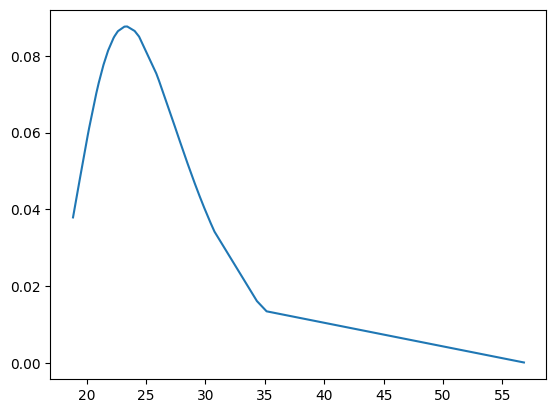

In [72]:
fig, ax = plt.subplots(1, 1)
ax.plot(Z,gumbel_r.pdf(Z,loc,scale))

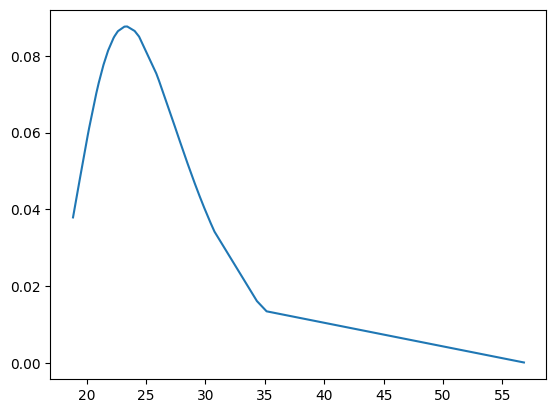

In [73]:
fig, ax = plt.subplots(1, 1)
ax.plot(Z,gumbel_r.pdf((Z-loc)/scale) / scale)

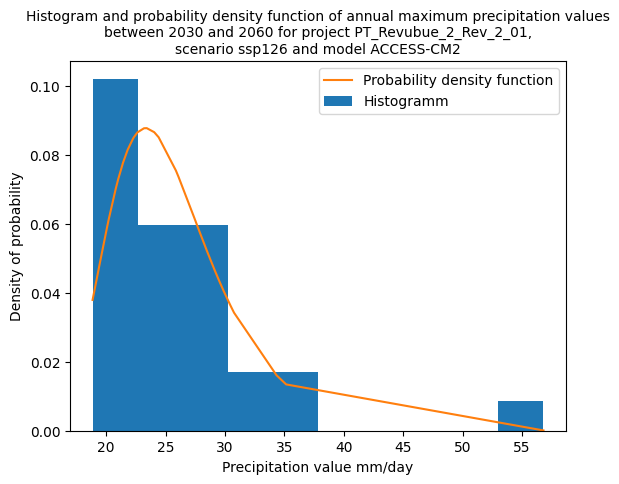

In [83]:
# xaxis is precipitation and yaxis is densiy of probability
myHist = plt.hist(Z,density=True) # If ``True``, draw and return a probability density: each bin 
# will display the bin's raw count divided by the total number of counts *and the bin width*
h = plt.plot(Z,gumbel_r.pdf(Z,loc,scale))
plt.xlabel('Precipitation value mm/day')
plt.ylabel('Density of probability' )
plt.title('Histogram and probability density function of annual maximum precipitation values\nbetween 2030 and 2060 for project PT_Revubue_2_Rev_2_01,\nscenario ssp126 and model ACCESS-CM2',fontdict={'fontsize': 10})
plt.legend(['Probability density function','Histogramm'])
title_png = 'test_density.png'
path_figure = os.path.join(out_path,'figures')
if not os.path.isdir(path_figure):
    os.makedirs(path_figure)
plt.savefig(os.path.join(path_figure,title_png),format ='png')
plt.show()

In [ ]:
# need to find which law to apply when